## Border and Obstacles
This notebook demonstrates key features of OptiWindNet in handling wind farm borders and obstacles through various examples.

Import required packages

In [1]:
from optiwindnet.api import WindFarmNetwork
import numpy as np
import matplotlib.pyplot as plt

Cordinates

In [2]:
borderC = np.array(
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)

obstaclesC = [
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
]

substationsC = np.array([[696, 1063],], dtype=float)
turbinesC = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)

Initialize wfn with the given borders and obstacles

<Axes: >

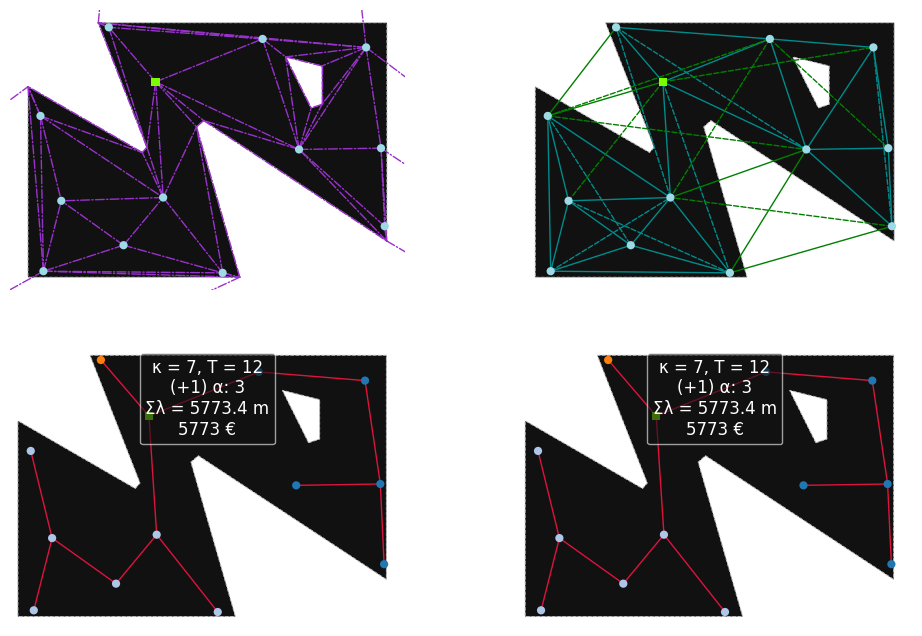

In [3]:
wfn_border_obstacles = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC, buffer_dist=1)
res_optimize = wfn_border_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_border_obstacles.plot_navigation_mesh(ax=ax1)
wfn_border_obstacles.plot_available_links(ax=ax2)
wfn_border_obstacles.plot_selected_links(ax=ax3)
wfn_border_obstacles.plot(ax=ax4)

Initialize wfn without obstacles (Only borders)

<Axes: >

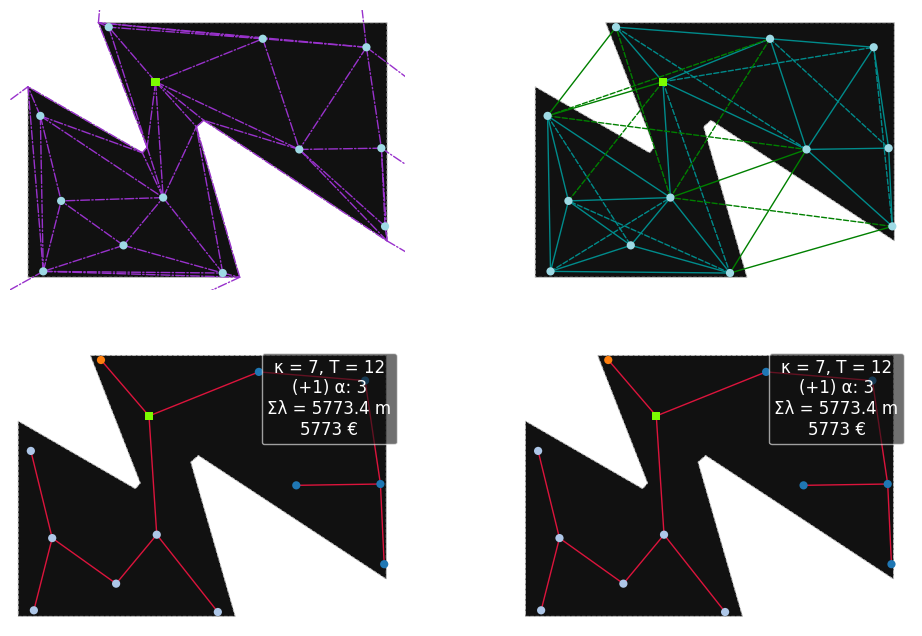

In [4]:
wfn_border = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC)
res_optimize = wfn_border.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_border.plot_navigation_mesh(ax=ax1)
wfn_border.plot_available_links(ax=ax2)
wfn_border.plot_selected_links(ax=ax3)
wfn_border.plot(ax=ax4)

Initialize wfn without exterior borders (Only obstacles)

⚠️ Obstacles are given while no border coordinate is defined, optiwindnet is creating borders based on turbine and obstacle coordinates.


<Axes: >

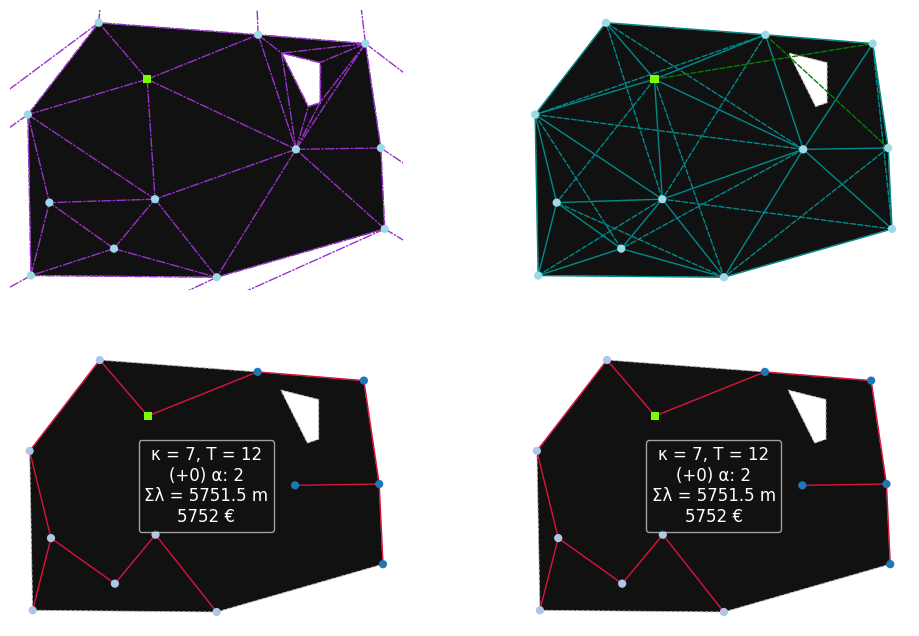

In [5]:
wfn_obstacles = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, obstaclesC=obstaclesC)
res_optimize = wfn_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_obstacles.plot_navigation_mesh(ax=ax1)
wfn_obstacles.plot_available_links(ax=ax2)
wfn_obstacles.plot_selected_links(ax=ax3)
wfn_obstacles.plot(ax=ax4)

Initialize wfn without borders and obstacles (No borders, no obstacles)

<Axes: >

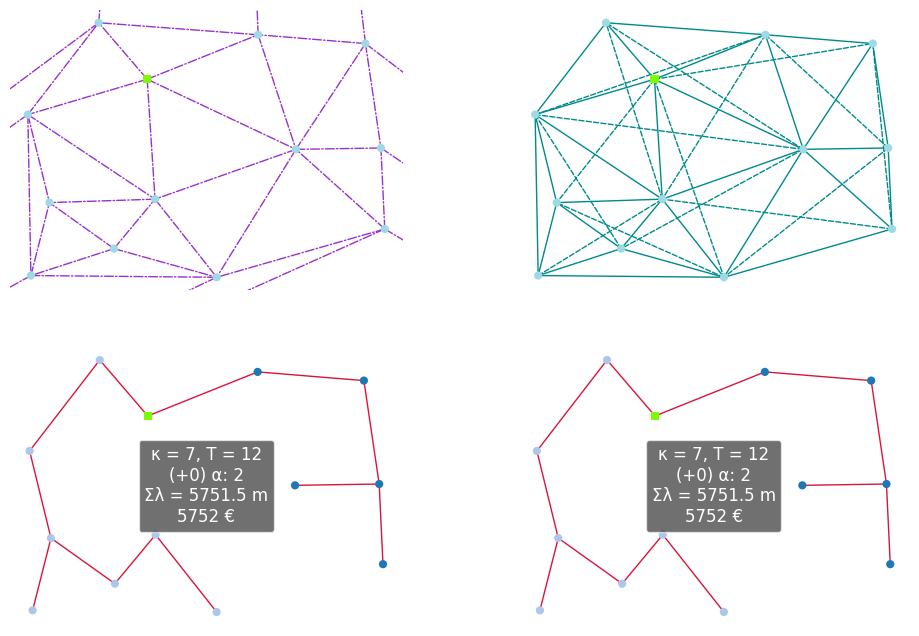

In [6]:
wfn = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7)
res_optimize = wfn.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn.plot_navigation_mesh(ax=ax1)
wfn.plot_available_links(ax=ax2)
wfn.plot_selected_links(ax=ax3)
wfn.plot(ax=ax4)

New obstacles (intersecting with the exterior borders)

In [7]:
obstaclesC = [
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    np.array([[-100, 100], [400, 100], [400, 400], [100, 400]]),
]

⚠️ Obstacle at index 1 intersects with the exteriour border and is merged into the exterior border.


<Axes: >

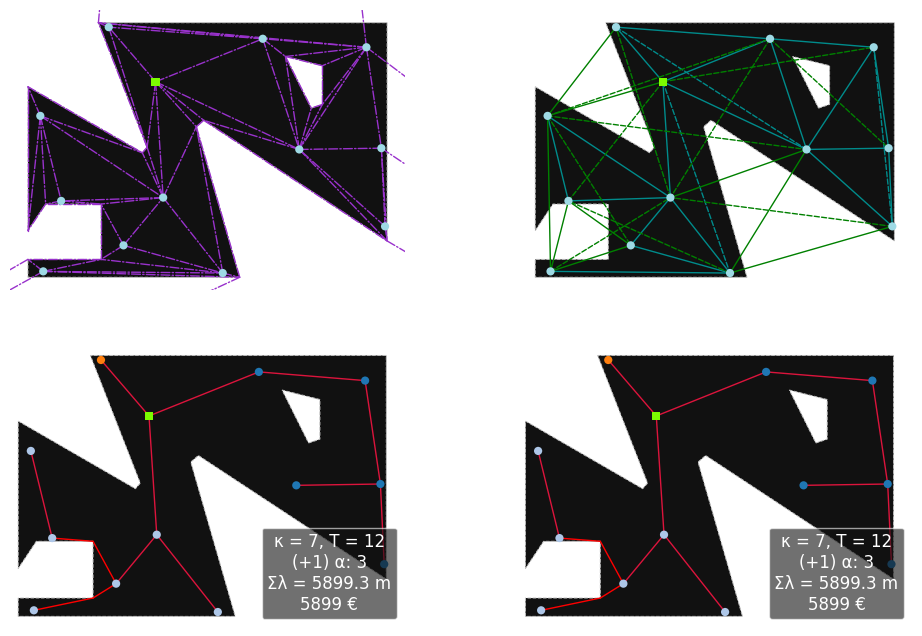

In [8]:
# border + obstacles
wfn_new_border_obstacles = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC)
res_optimize = wfn_new_border_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_border_obstacles.plot_navigation_mesh(ax=ax1)
wfn_new_border_obstacles.plot_available_links(ax=ax2)
wfn_new_border_obstacles.plot_selected_links(ax=ax3)
wfn_new_border_obstacles.plot(ax=ax4)

New obstacles without borders

⚠️ Obstacles are given while no border coordinate is defined, optiwindnet is creating borders based on turbine and obstacle coordinates.
⚠️ Obstacle at index 1 intersects with the exteriour border and is merged into the exterior border.


<Axes: >

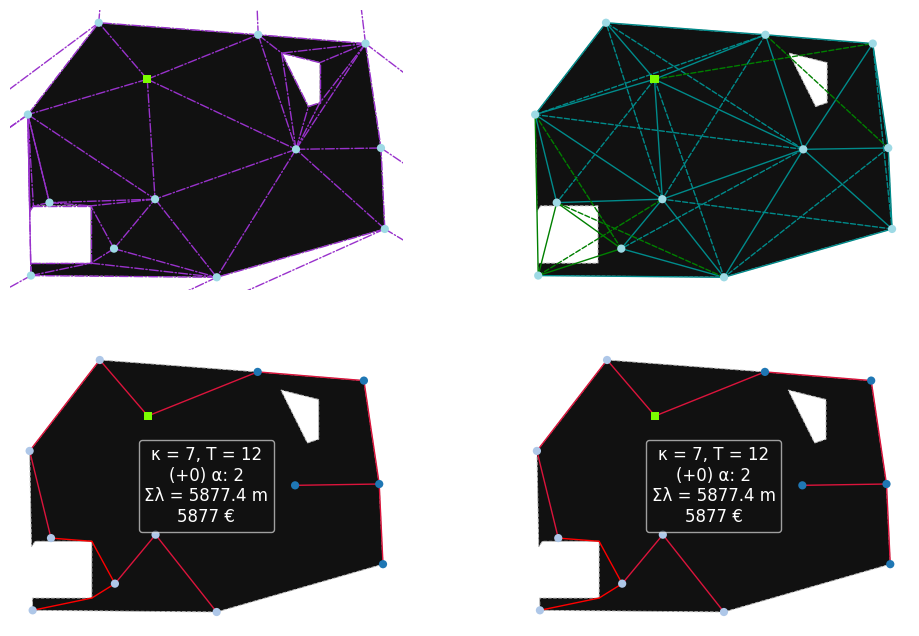

In [9]:
# only obstacles
wfn_new_obstacles = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, obstaclesC=obstaclesC)
res_optimize = wfn_new_obstacles.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_new_obstacles.plot_navigation_mesh(ax=ax1)
wfn_new_obstacles.plot_available_links(ax=ax2)
wfn_new_obstacles.plot_selected_links(ax=ax3)
wfn_new_obstacles.plot(ax=ax4)

Obstacle outside the borders

⚠️ Obstacle at index 1 is completely outside the border and is neglegcted.


<Axes: >

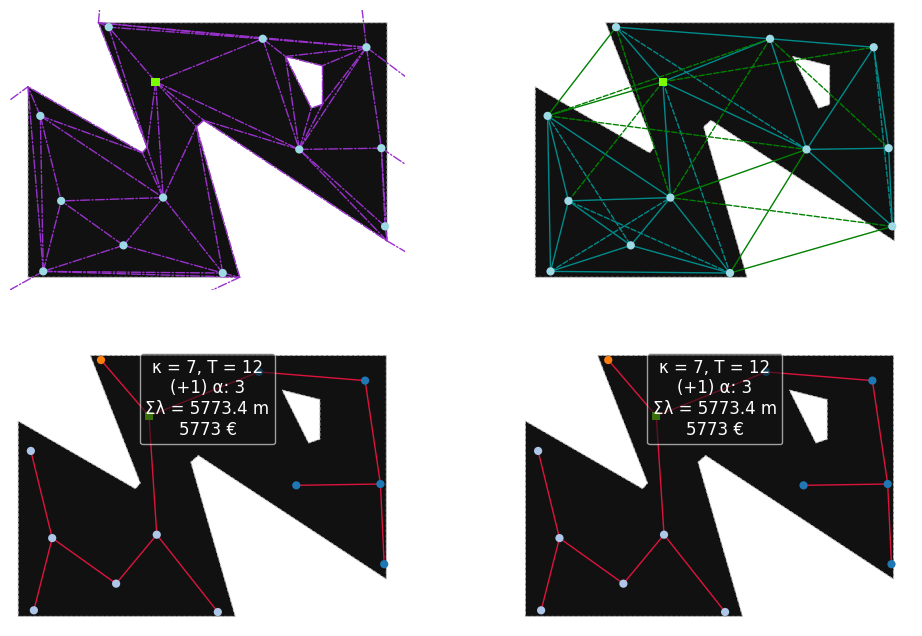

In [10]:
obstaclesC = [
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    np.array([[-200, 100], [-100, 100], [-100, 400], [-200, 400]]),
]

substationsC = np.array([[696, 1063],], dtype=float)
turbinesC = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)

wfn_obs_outside = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC)
res_optimize = wfn_obs_outside.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_obs_outside.plot_navigation_mesh(ax=ax1)
wfn_obs_outside.plot_available_links(ax=ax2)
wfn_obs_outside.plot_selected_links(ax=ax3)
wfn_obs_outside.plot(ax=ax4)

# Buffering
A buffer can be specified when initializing the WindFarmNetwork. The exterior border will be expanded, while interior obstacles will be shrunk accordingly.

example 1:

In [11]:
borderC = np.array(
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)

obstaclesC = [
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
]

substationsC = np.array([[696, 1063],], dtype=float)
turbinesC = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)

<Axes: >

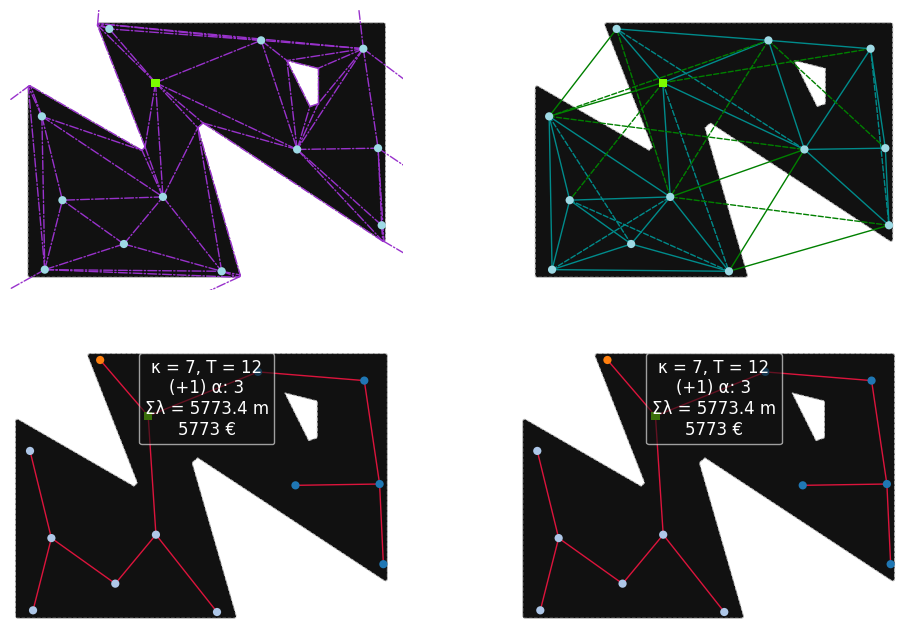

In [12]:
buffer_dist = 10
wfn_ex1 = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC, buffer_dist=buffer_dist)
res_optimize = wfn_ex1.optimize()
fig, axs = plt.subplots(2, 2, facecolor='none', figsize=(12, 8))
ax1, ax2, ax3, ax4 = axs.flatten()
wfn_ex1.plot_navigation_mesh(ax=ax1)
wfn_ex1.plot_available_links(ax=ax2)
wfn_ex1.plot_selected_links(ax=ax3)
wfn_ex1.plot(ax=ax4)

Original vs buffered border/obstacles can be visualized using plot_original_vs_buffered()

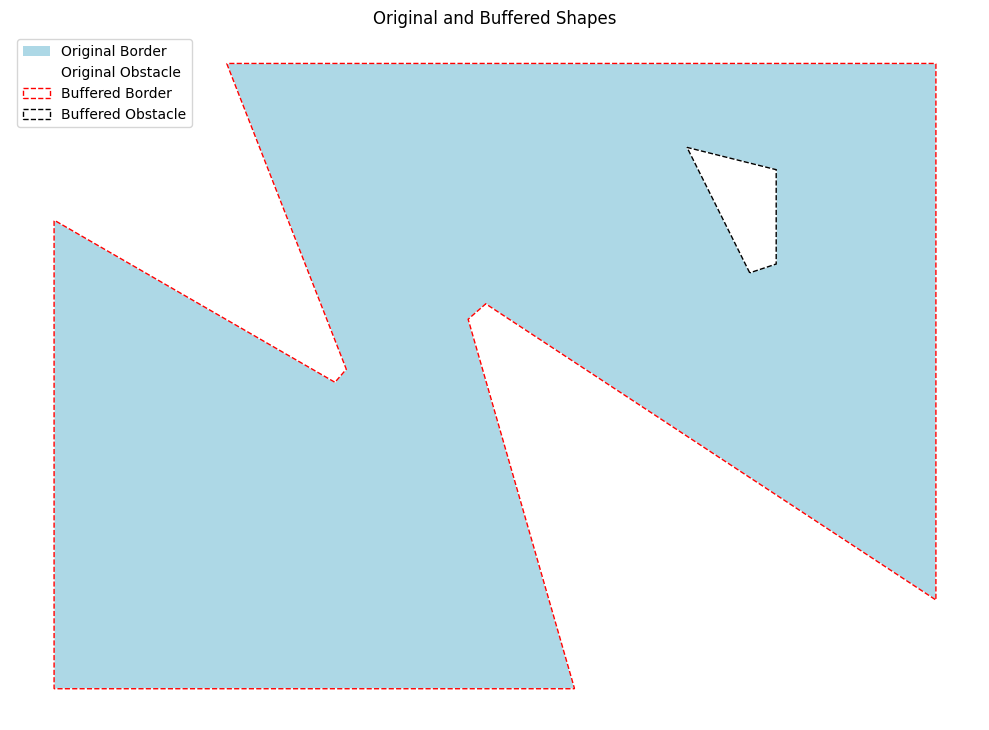

In [13]:
wfn_border_obstacles.plot_original_vs_buffered()

Example 2:
Removal of a concavity

In [14]:
borderC = np.array(
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)

obstaclesC = [
    np.array([[1400, 1200], [1440, 1200], [1440, 1500], [1400, 1500]]),
    np.array([[1800, 1300], [2000, 1300], [2000, 1301], [1800, 1301]]),
]

buffer_dist = 1
wfn_ex2 = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC, buffer_dist=buffer_dist)

⚠️ Obstacle at index 0 intersects with the exteriour border and is merged into the exterior border.
⚠️ Obstacle at index 1 intersects with the exteriour border and is merged into the exterior border.
⚠️ The defined border is non-convex and buffering may introduce unexpexted changes in the exterior border. For visual comparison use plot_original_vs_buffered().


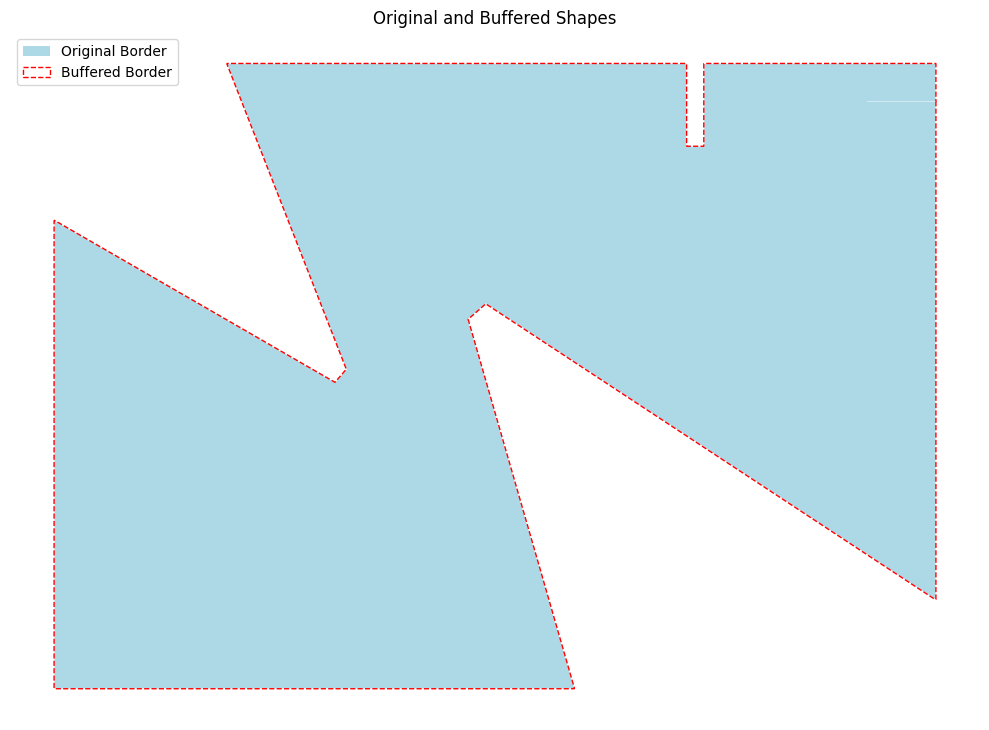

In [15]:
wfn_ex2.plot_original_vs_buffered()

Example 3:
Removal of an obstacle

In [16]:
borderC = np.array(
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)

obstaclesC = [
    np.array([[1540, 920], [1541, 920], [1541, 1100], [1540, 1100]]),
    np.array([[1300, 920], [1320, 920], [1320, 1100], [1300, 1100]]),
    np.array([[1200, 920], [1205, 920], [1205, 1100], [1200, 1100]]),
]

buffer_dist = 1
wfn_ex3 = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC, buffer_dist=buffer_dist)

⚠️ Buffering by 1.00 completely removed the obstacle at index 0. For visual comparison use plot_original_vs_buffered().


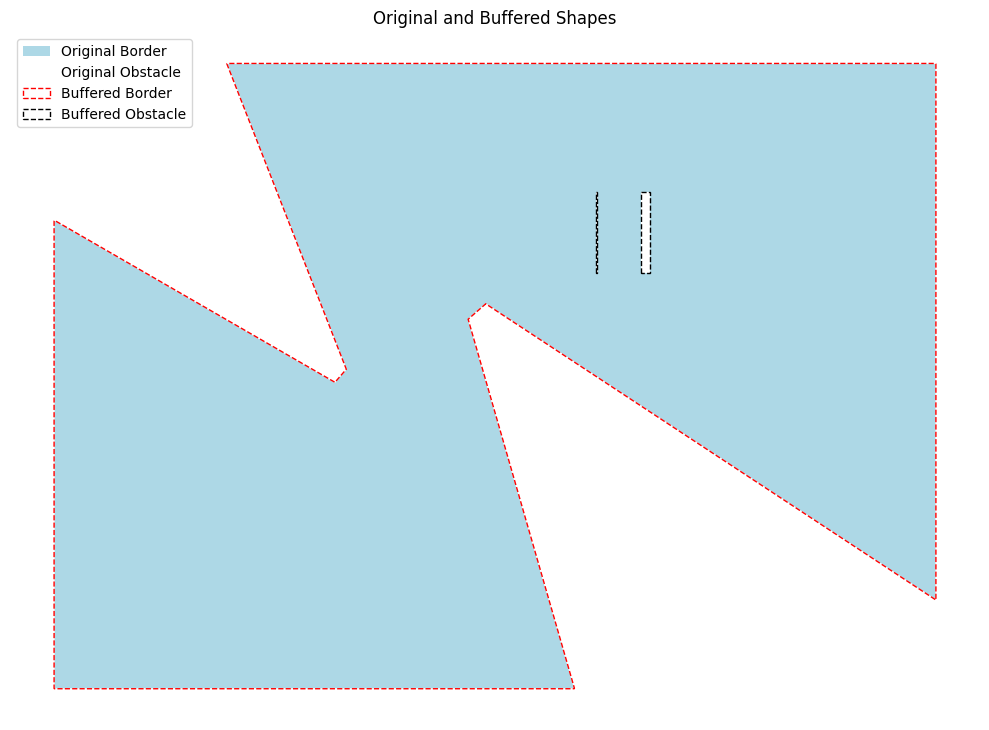

In [17]:
wfn_ex3.plot_original_vs_buffered()

Example 4:
Split of an obstacle.

In [18]:
borderC = np.array(
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)


obstaclesC = [
    np.array([[1536, 920], [1580, 920], [1580, 1000], [1540, 1000], [1540, 1010], [1580, 1010], [1580, 1100], [1536, 1100]]),
    np.array([[1300, 920], [1320, 920], [1320, 1100], [1300, 1100]]),
    np.array([[1200, 920], [1205, 920], [1205, 1100], [1200, 1100]]),
]

buffer_dist = 2
wfn_ex4 = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC, buffer_dist=buffer_dist)

⚠️ Shrinking by 2.00 split the obstacle at index 0 into 2 pieces. For visual comparison use plot_original_vs_buffered().


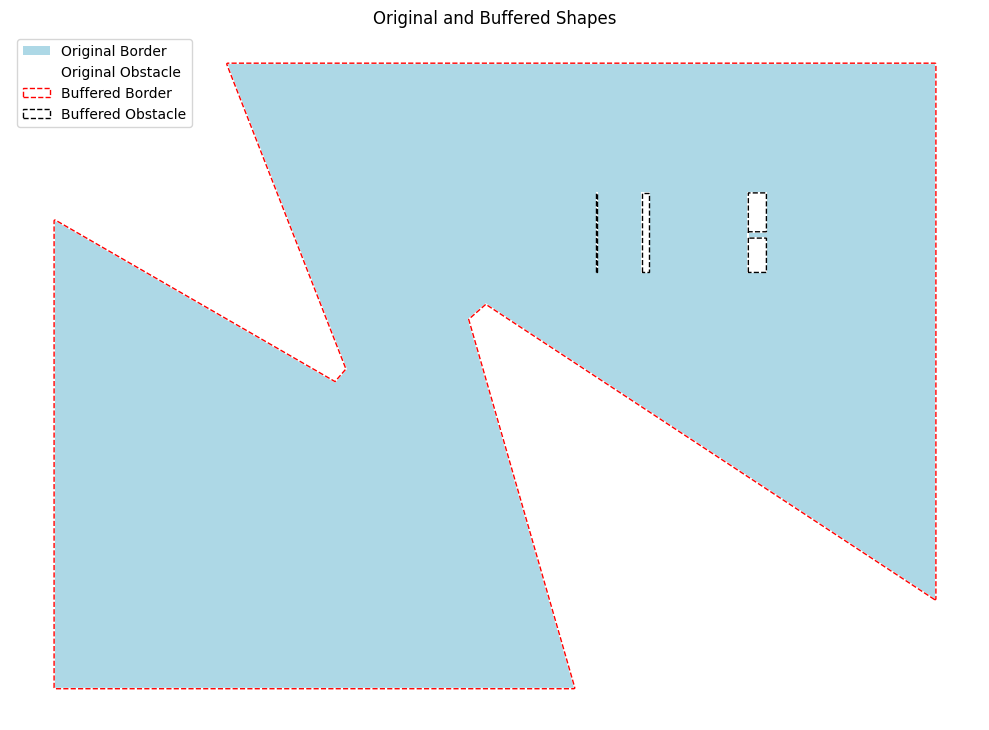

In [19]:
wfn_ex4.plot_original_vs_buffered()

Example 5:
Removal of an obstacle + split of another obtacle

In [20]:
borderC = np.array(
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)


obstaclesC = [
    np.array([[1535, 920], [1580, 920], [1580, 1000], [1540, 1000], [1540, 1010], [1580, 1010], [1580, 1100], [1535, 1100]]),
    np.array([[1300, 920], [1320, 920], [1320, 1100], [1300, 1100]]),
    np.array([[1200, 920], [1205, 920], [1205, 1100], [1200, 1100]]),
]

buffer_dist = 5
wfn_ex5 = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC, buffer_dist=buffer_dist)

⚠️ Shrinking by 5.00 split the obstacle at index 0 into 2 pieces. For visual comparison use plot_original_vs_buffered().
⚠️ Buffering by 5.00 completely removed the obstacle at index 2. For visual comparison use plot_original_vs_buffered().


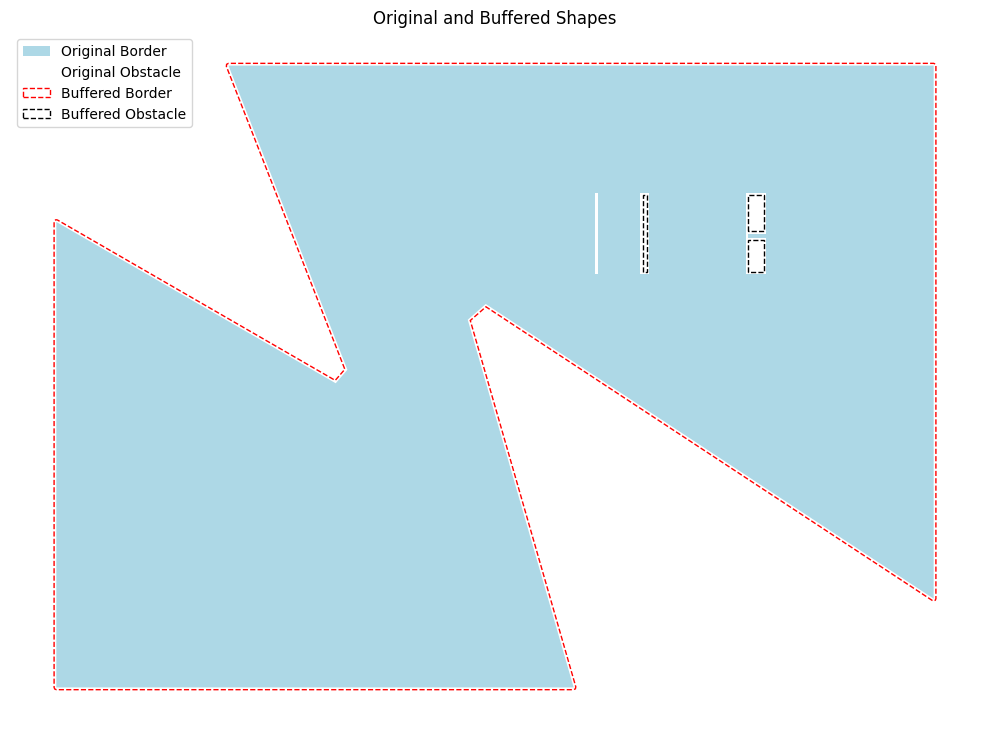

In [21]:
wfn_ex5.plot_original_vs_buffered()

# Turbines outside the border or inside the obstacles

Optiwindnet checks if the turbinesC are defined properly with respect to the given border and obstacles.

Turbines out of the borders

In [22]:
obstaclesC = [
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
]

substationsC = np.array([[696, 1063],], dtype=float)
turbinesC = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878],  [2000, 2000]],
    dtype=float
)

wfn_obs_outside = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC)

ValueError: Turbines at indices [12] are outside the border!

Turbines inside the obstacles

In [23]:
obstaclesC = [
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
]

substationsC = np.array([[696, 1063],], dtype=float)
turbinesC = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878],  [1550, 1000]],
    dtype=float
)

wfn_obs_outside = WindFarmNetwork(turbinesC=turbinesC, substationsC=substationsC, cables=7, borderC=borderC, obstaclesC=obstaclesC)

ValueError: Turbines at indices [12] are inside the obstacle at index 0!